In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Defining Problem Statement and Analysing basic metrics:**

Netflix is one of the most popular media and video streaming platforms. They
have over 8000 movies or tv shows available on their platform, as of mid-2021,
they have over 200M Subscribers globally.



The particular business case focuses on the Netflix show data and provides
insightful information on 8807 shows

Analyzing the data and generating insights helps Netflix decide which type of
shows/movies to produce and how to grow the business.





In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.shape

(8807, 12)

Observation on Data : Understanding the columns in the dataset, shape, data type of all attributes, missing value detection.

In [ ]:
# Filtering  Data Column wise so that each row has one director,one genre,one actor, one country (checking for nesting and then un-nesting)
# 1. Separting Casts in each column

#finding nesting
column = 'cast'
df[df[column].apply(lambda x: "," in str(x))]

#fixing nesting
small_df = df[['title','cast']]
small_df["list_of_cast"] = small_df["cast"].apply(lambda x: str(x).split(","))
small_df=small_df.explode("list_of_cast")
small_df

<ipython-input-7-9913fa81d49c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df["list_of_cast"] = small_df["cast"].apply(lambda x: str(x).split(","))


,title,cast,list_of_cast
0,Dick Johnson Is Dead,NaN,nan
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Ama Qamata
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Khosi Ngema
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Gail Mabalane
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Thabang Molaba
...,...,...,...
8806,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Manish Chaudhary
8806,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Meghna Malik
8806,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Malkeet Rauni
8806,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Anita Shabdish


In [ ]:

#fixing nesting for countries
new_df = df[['title','country']]
new_df["list_of_country"] = new_df["country"].apply(lambda x: str(x).split(","))
new_df=new_df.explode("list_of_country")
new_df

<ipython-input-8-bc56ac8836cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["list_of_country"] = new_df["country"].apply(lambda x: str(x).split(","))


,title,country,list_of_country
0,Dick Johnson Is Dead,United States,United States
1,Blood & Water,South Africa,South Africa
2,Ganglands,NaN,nan
3,Jailbirds New Orleans,NaN,nan
4,Kota Factory,India,India
...,...,...,...
8802,Zodiac,United States,United States
8803,Zombie Dumb,NaN,nan
8804,Zombieland,United States,United States
8805,Zoom,United States,United States


In [ ]:
#fixing nesting for genre
new_df1 = df[['title','listed_in']]
new_df1["list_of_genre"] = new_df1["listed_in"].apply(lambda x: str(x).split(","))
new_df1=new_df1.explode("list_of_genre")
new_df1

<ipython-input-9-8ffc89928228>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1["list_of_genre"] = new_df1["listed_in"].apply(lambda x: str(x).split(","))


,title,listed_in,list_of_genre
0,Dick Johnson Is Dead,Documentaries,Documentaries
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries",TV Dramas
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries",TV Mysteries
2,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows
...,...,...,...
8805,Zoom,"Children & Family Movies, Comedies",Children & Family Movies
8805,Zoom,"Children & Family Movies, Comedies",Comedies
8806,Zubaan,"Dramas, International Movies, Music & Musicals",Dramas
8806,Zubaan,"Dramas, International Movies, Music & Musicals",International Movies


In [ ]:
new_df2 = df[['title','director']]
new_df2["list_of_directors"] = new_df2["director"].apply(lambda x: str(x).split(","))
new_df2=new_df2.explode("list_of_directors")
new_df2

<ipython-input-10-6934c397b901>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2["list_of_directors"] = new_df2["director"].apply(lambda x: str(x).split(","))


,title,director,list_of_directors
0,Dick Johnson Is Dead,Kirsten Johnson,Kirsten Johnson
1,Blood & Water,NaN,nan
2,Ganglands,Julien Leclercq,Julien Leclercq
3,Jailbirds New Orleans,NaN,nan
4,Kota Factory,NaN,nan
...,...,...,...
8802,Zodiac,David Fincher,David Fincher
8803,Zombie Dumb,NaN,nan
8804,Zombieland,Ruben Fleischer,Ruben Fleischer
8805,Zoom,Peter Hewitt,Peter Hewitt


**Merging the dataframes: **

In [ ]:

df1 = pd.merge(small_df,new_df,on='title')
df1

,title,cast,list_of_cast,country,list_of_country
0,Dick Johnson Is Dead,NaN,nan,United States,United States
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Ama Qamata,South Africa,South Africa
2,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Khosi Ngema,South Africa,South Africa
3,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Gail Mabalane,South Africa,South Africa
4,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Thabang Molaba,South Africa,South Africa
...,...,...,...,...,...
81736,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Manish Chaudhary,India,India
81737,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Meghna Malik,India,India
81738,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Malkeet Rauni,India,India
81739,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Anita Shabdish,India,India


In [ ]:
df2 = pd.merge(df1,new_df1,on='title')
df2

,title,cast,list_of_cast,country,list_of_country,listed_in,list_of_genre
0,Dick Johnson Is Dead,NaN,nan,United States,United States,Documentaries,Documentaries
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Ama Qamata,South Africa,South Africa,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows
2,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Ama Qamata,South Africa,South Africa,"International TV Shows, TV Dramas, TV Mysteries",TV Dramas
3,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Ama Qamata,South Africa,South Africa,"International TV Shows, TV Dramas, TV Mysteries",TV Mysteries
4,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Khosi Ngema,South Africa,South Africa,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows
...,...,...,...,...,...,...,...
186394,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Anita Shabdish,India,India,"Dramas, International Movies, Music & Musicals",International Movies
186395,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Anita Shabdish,India,India,"Dramas, International Movies, Music & Musicals",Music & Musicals
186396,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Chittaranjan Tripathy,India,India,"Dramas, International Movies, Music & Musicals",Dramas
186397,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Chittaranjan Tripathy,India,India,"Dramas, International Movies, Music & Musicals",International Movies


In [ ]:
df3=pd.merge(df2,new_df2,on='title')
df3

,title,cast,list_of_cast,country,list_of_country,listed_in,list_of_genre,director,list_of_directors
0,Dick Johnson Is Dead,NaN,nan,United States,United States,Documentaries,Documentaries,Kirsten Johnson,Kirsten Johnson
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Ama Qamata,South Africa,South Africa,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows,NaN,nan
2,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Ama Qamata,South Africa,South Africa,"International TV Shows, TV Dramas, TV Mysteries",TV Dramas,NaN,nan
3,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Ama Qamata,South Africa,South Africa,"International TV Shows, TV Dramas, TV Mysteries",TV Mysteries,NaN,nan
4,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Khosi Ngema,South Africa,South Africa,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows,NaN,nan
...,...,...,...,...,...,...,...,...,...
202060,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Anita Shabdish,India,India,"Dramas, International Movies, Music & Musicals",International Movies,Mozez Singh,Mozez Singh
202061,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Anita Shabdish,India,India,"Dramas, International Movies, Music & Musicals",Music & Musicals,Mozez Singh,Mozez Singh
202062,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Chittaranjan Tripathy,India,India,"Dramas, International Movies, Music & Musicals",Dramas,Mozez Singh,Mozez Singh
202063,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Chittaranjan Tripathy,India,India,"Dramas, International Movies, Music & Musicals",International Movies,Mozez Singh,Mozez Singh


In [ ]:
df4 = pd.merge(df3,df,on='title',how='left')
df4

,title,cast_x,list_of_cast,country_x,list_of_country,listed_in_x,list_of_genre,director_x,list_of_directors,show_id,type,director_y,cast_y,country_y,date_added,release_year,rating,duration,listed_in_y,description
0,Dick Johnson Is Dead,NaN,nan,United States,United States,Documentaries,Documentaries,Kirsten Johnson,Kirsten Johnson,s1,Movie,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Ama Qamata,South Africa,South Africa,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows,NaN,nan,s2,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Ama Qamata,South Africa,South Africa,"International TV Shows, TV Dramas, TV Mysteries",TV Dramas,NaN,nan,s2,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Ama Qamata,South Africa,South Africa,"International TV Shows, TV Dramas, TV Mysteries",TV Mysteries,NaN,nan,s2,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Khosi Ngema,South Africa,South Africa,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows,NaN,nan,s2,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Anita Shabdish,India,India,"Dramas, International Movies, Music & Musicals",International Movies,Mozez Singh,Mozez Singh,s8807,Movie,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
202061,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Anita Shabdish,India,India,"Dramas, International Movies, Music & Musicals",Music & Musicals,Mozez Singh,Mozez Singh,s8807,Movie,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
202062,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Chittaranjan Tripathy,India,India,"Dramas, International Movies, Music & Musicals",Dramas,Mozez Singh,Mozez Singh,s8807,Movie,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
202063,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Chittaranjan Tripathy,India,India,"Dramas, International Movies, Music & Musicals",International Movies,Mozez Singh,Mozez Singh,s8807,Movie,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
df5= df4.drop(columns=['cast_x','country_x','listed_in_x','director_x','cast_y','country_y','listed_in_y','director_y'],axis=1,inplace=True)

#dropping the unncessary columns.


In [ ]:

df4["month"]=df4["date_added"].apply(lambda x:str(x).split(','))
df4["month"]=df4["month"].str[-2]
df4

df4["year"]=df4["date_added"].apply(lambda x:str(x).split(','))
df4["year"]=df4["year"].str[-1]
df4

,title,list_of_cast,list_of_country,list_of_genre,list_of_directors,show_id,type,date_added,release_year,rating,duration,description,month,year
0,Dick Johnson Is Dead,nan,United States,Documentaries,Kirsten Johnson,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",September 25,2021
1,Blood & Water,Ama Qamata,South Africa,International TV Shows,nan,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021
2,Blood & Water,Ama Qamata,South Africa,TV Dramas,nan,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021
3,Blood & Water,Ama Qamata,South Africa,TV Mysteries,nan,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021
4,Blood & Water,Khosi Ngema,South Africa,International TV Shows,nan,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,India,International Movies,Mozez Singh,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019
202061,Zubaan,Anita Shabdish,India,Music & Musicals,Mozez Singh,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019
202062,Zubaan,Chittaranjan Tripathy,India,Dramas,Mozez Singh,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019
202063,Zubaan,Chittaranjan Tripathy,India,International Movies,Mozez Singh,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019


In [ ]:
df4.drop(['date_added'],axis =1,inplace=True)
df4

,title,list_of_cast,list_of_country,list_of_genre,list_of_directors,show_id,type,release_year,rating,duration,description,month,year
0,Dick Johnson Is Dead,nan,United States,Documentaries,Kirsten Johnson,s1,Movie,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",September 25,2021
1,Blood & Water,Ama Qamata,South Africa,International TV Shows,nan,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021
2,Blood & Water,Ama Qamata,South Africa,TV Dramas,nan,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021
3,Blood & Water,Ama Qamata,South Africa,TV Mysteries,nan,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021
4,Blood & Water,Khosi Ngema,South Africa,International TV Shows,nan,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,India,International Movies,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019
202061,Zubaan,Anita Shabdish,India,Music & Musicals,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019
202062,Zubaan,Chittaranjan Tripathy,India,Dramas,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019
202063,Zubaan,Chittaranjan Tripathy,India,International Movies,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019


**Handling Null Values **::

In [ ]:
df4["list_of_directors"].replace(["nan"],["UnKnown Director"],inplace=True)
df4['list_of_cast'].replace(["nan"],["UnKnown Cast"],inplace=True)
df4['list_of_genre'].replace(["nan"],["Unknown Genre"],inplace=True)
df4['list_of_country'].replace(["nan"],["Unknown Country"],inplace=True)


df4

,title,list_of_cast,list_of_country,list_of_genre,list_of_directors,show_id,type,release_year,rating,duration,description,month,year
0,Dick Johnson Is Dead,UnKnown Cast,United States,Documentaries,Kirsten Johnson,s1,Movie,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",September 25,2021
1,Blood & Water,Ama Qamata,South Africa,International TV Shows,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021
2,Blood & Water,Ama Qamata,South Africa,TV Dramas,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021
3,Blood & Water,Ama Qamata,South Africa,TV Mysteries,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021
4,Blood & Water,Khosi Ngema,South Africa,International TV Shows,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,India,International Movies,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019
202061,Zubaan,Anita Shabdish,India,Music & Musicals,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019
202062,Zubaan,Chittaranjan Tripathy,India,Dramas,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019
202063,Zubaan,Chittaranjan Tripathy,India,International Movies,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019


In [ ]:
df4.isnull().sum()

title                  0
list_of_cast           0
list_of_country        0
list_of_genre          0
list_of_directors      0
show_id                0
type                   0
release_year           0
rating                67
duration               3
description            0
month                158
year                   0
dtype: int64

In [ ]:
#converting data_added to datetime.

df4['date_added'] = pd.to_datetime(df['date_added'],errors='coerce',format='mixed')
df4

,title,list_of_cast,list_of_country,list_of_genre,list_of_directors,show_id,type,release_year,rating,duration,description,month,year,date_added
0,Dick Johnson Is Dead,UnKnown Cast,United States,Documentaries,Kirsten Johnson,s1,Movie,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",September 25,2021,2021-09-25
1,Blood & Water,Ama Qamata,South Africa,International TV Shows,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021,2021-09-24
2,Blood & Water,Ama Qamata,South Africa,TV Dramas,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021,2021-09-24
3,Blood & Water,Ama Qamata,South Africa,TV Mysteries,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021,2021-09-24
4,Blood & Water,Khosi Ngema,South Africa,International TV Shows,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021,2021-09-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,India,International Movies,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019,NaT
202061,Zubaan,Anita Shabdish,India,Music & Musicals,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019,NaT
202062,Zubaan,Chittaranjan Tripathy,India,Dramas,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019,NaT
202063,Zubaan,Chittaranjan Tripathy,India,International Movies,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019,NaT


In [ ]:
df4['date_added'].fillna(0, inplace=True)
df4['rating'].fillna(0,inplace=True)
df4['duration'].fillna(0,inplace=True)
df4

,title,list_of_cast,list_of_country,list_of_genre,list_of_directors,show_id,type,release_year,rating,duration,description,month,year,date_added
0,Dick Johnson Is Dead,UnKnown Cast,United States,Documentaries,Kirsten Johnson,s1,Movie,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",September 25,2021,2021-09-25 00:00:00
1,Blood & Water,Ama Qamata,South Africa,International TV Shows,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021,2021-09-24 00:00:00
2,Blood & Water,Ama Qamata,South Africa,TV Dramas,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021,2021-09-24 00:00:00
3,Blood & Water,Ama Qamata,South Africa,TV Mysteries,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021,2021-09-24 00:00:00
4,Blood & Water,Khosi Ngema,South Africa,International TV Shows,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021,2021-09-24 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,India,International Movies,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019,0
202061,Zubaan,Anita Shabdish,India,Music & Musicals,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019,0
202062,Zubaan,Chittaranjan Tripathy,India,Dramas,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019,0
202063,Zubaan,Chittaranjan Tripathy,India,International Movies,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019,0


In [ ]:
df4.isnull().sum()

title                  0
list_of_cast           0
list_of_country        0
list_of_genre          0
list_of_directors      0
show_id                0
type                   0
release_year           0
rating                 0
duration               0
description            0
month                158
year                   0
date_added             0
dtype: int64

Finding the counts of each categorical variable both using graphical and non-
graphical analysis.




In [ ]:
#Non-Graphical Analysis: Value counts and unique attributes

#Unique Attributes:

print("No of Movie title:-", df['title'].nunique())
print("No. of Ratings:-", df['rating'].nunique())
print("No. of Directors:-", df['director'].nunique())
print("No.of Casts:-",df['cast'].nunique())
print("No.of Country:-",df['country'].nunique())
print("Total Genre:-",df['listed_in'].nunique())
print("Total Type:-",df['type'].nunique())


No of Movie title:- 8807
No. of Ratings:- 17
No. of Directors:- 4528
No.of Casts:- 7692
No.of Country:- 748
Total Genre:- 514
Total Type:- 2


In [ ]:
#Value Count of casts

df['cast'].value_counts()

cast
David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                              

In [ ]:
#value counts of type
df['type'].value_counts().reset_index()


,type,count
0,Movie,6131
1,TV Show,2676


In [ ]:
#value counts for country
df['country'].value_counts().reset_index()

,country,count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
...,...,...
743,"Romania, Bulgaria, Hungary",1
744,"Uruguay, Guatemala",1
745,"France, Senegal, Belgium",1
746,"Mexico, United States, Spain, Colombia",1


In [ ]:
#value counts for genres
df['listed_in'].value_counts().reset_index()

,listed_in,count
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",274
4,"Dramas, Independent Movies, International Movies",252
...,...,...
509,"Kids' TV, TV Action & Adventure, TV Dramas",1
510,"TV Comedies, TV Dramas, TV Horror",1
511,"Children & Family Movies, Comedies, LGBTQ Movies",1
512,"Kids' TV, Spanish-Language TV Shows, Teen TV S...",1


In [ ]:
#value count for casts

df['cast'].value_counts().reset_index()

,cast,count
0,David Attenborough,19
1,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",14
2,Samuel West,10
3,Jeff Dunham,7
4,"David Spade, London Hughes, Fortune Feimster",6
...,...,...
7687,"Michael Peña, Diego Luna, Tenoch Huerta, Joaqu...",1
7688,"Nick Lachey, Vanessa Lachey",1
7689,"Takeru Sato, Kasumi Arimura, Haru, Kentaro Sak...",1
7690,"Toyin Abraham, Sambasa Nzeribe, Chioma Chukwuk...",1


In [ ]:
#value count for directors

df['director'].value_counts().reset_index()

,director,count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14
...,...,...
4523,"Raymie Muzquiz, Stu Livingston",1
4524,Joe Menendez,1
4525,Eric Bross,1
4526,Will Eisenberg,1


**Graphical Representation using countplot: **


<Axes: xlabel='type', ylabel='count'>

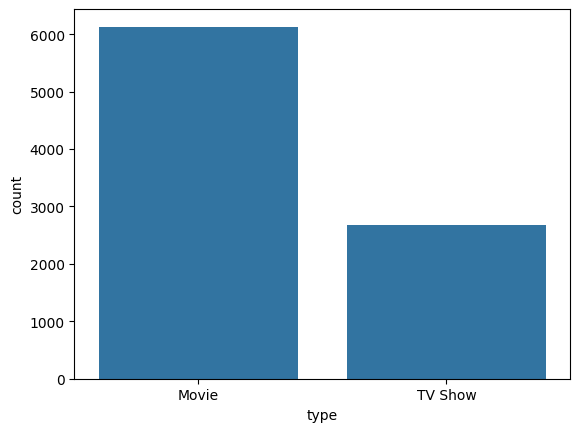

In [ ]:
#graphical representation of total movies & Tv show(Univariate Analysis)

sns.countplot(x='type',data=df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'TV-MA'),
  Text(2, 0, 'PG'),
  Text(3, 0, 'TV-14'),
  Text(4, 0, 'TV-PG'),
  Text(5, 0, 'TV-Y'),
  Text(6, 0, 'TV-Y7'),
  Text(7, 0, 'R'),
  Text(8, 0, 'TV-G'),
  Text(9, 0, 'G'),
  Text(10, 0, 'NC-17'),
  Text(11, 0, '74 min'),
  Text(12, 0, '84 min'),
  Text(13, 0, '66 min'),
  Text(14, 0, 'NR'),
  Text(15, 0, 'TV-Y7-FV'),
  Text(16, 0, 'UR')])

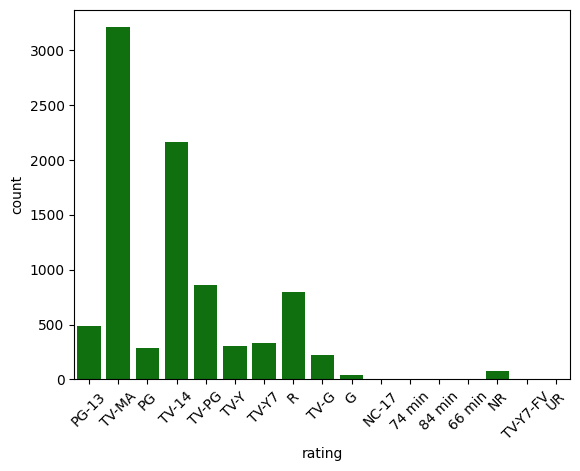

In [ ]:
sns.countplot(x='rating',data=df,color='g')
plt.xticks(rotation=45)

### **Comparison of tv shows vs. movies.**

In [ ]:
#Seprating the tables for movies and series
def func(X):
  if X=='Movie':
    return 1
  else:
    return 0
df4['new']=df4['type'].apply(func)
df4

,title,list_of_cast,list_of_country,list_of_genre,list_of_directors,show_id,type,release_year,rating,duration,description,month,year,date_added,new
0,Dick Johnson Is Dead,UnKnown Cast,United States,Documentaries,Kirsten Johnson,s1,Movie,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",September 25,2021,2021-09-25 00:00:00,1
1,Blood & Water,Ama Qamata,South Africa,International TV Shows,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021,2021-09-24 00:00:00,0
2,Blood & Water,Ama Qamata,South Africa,TV Dramas,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021,2021-09-24 00:00:00,0
3,Blood & Water,Ama Qamata,South Africa,TV Mysteries,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021,2021-09-24 00:00:00,0
4,Blood & Water,Khosi Ngema,South Africa,International TV Shows,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021,2021-09-24 00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,India,International Movies,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019,0,1
202061,Zubaan,Anita Shabdish,India,Music & Musicals,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019,0,1
202062,Zubaan,Chittaranjan Tripathy,India,Dramas,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019,0,1
202063,Zubaan,Chittaranjan Tripathy,India,International Movies,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019,0,1


In [ ]:
#movies :
df_final_movies = df4[df4["new"] == 1].copy()
df_final_movies.drop(['new'],axis=1,inplace=True)



In [ ]:
df_final_movies

,title,list_of_cast,list_of_country,list_of_genre,list_of_directors,show_id,type,release_year,rating,duration,description,month,year,date_added
0,Dick Johnson Is Dead,UnKnown Cast,United States,Documentaries,Kirsten Johnson,s1,Movie,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",September 25,2021,2021-09-25 00:00:00
159,My Little Pony: A New Generation,Vanessa Hudgens,Unknown Country,Children & Family Movies,Robert Cullen,s7,Movie,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,September 24,2021,2021-09-01 00:00:00
160,My Little Pony: A New Generation,Vanessa Hudgens,Unknown Country,Children & Family Movies,José Luis Ucha,s7,Movie,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,September 24,2021,2021-09-01 00:00:00
161,My Little Pony: A New Generation,Kimiko Glenn,Unknown Country,Children & Family Movies,Robert Cullen,s7,Movie,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,September 24,2021,2021-09-01 00:00:00
162,My Little Pony: A New Generation,Kimiko Glenn,Unknown Country,Children & Family Movies,José Luis Ucha,s7,Movie,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,September 24,2021,2021-09-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,India,International Movies,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019,0
202061,Zubaan,Anita Shabdish,India,Music & Musicals,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019,0
202062,Zubaan,Chittaranjan Tripathy,India,Dramas,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019,0
202063,Zubaan,Chittaranjan Tripathy,India,International Movies,Mozez Singh,s8807,Movie,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March 2,2019,0


In [ ]:
df_final_movies.drop(['date_added'],axis=1,inplace=True)


In [ ]:
#series
df_final_series = df4[df4["new"] == 0].copy()
df_final_series.drop(['new'],axis=1,inplace=True)
df_final_series

,title,list_of_cast,list_of_country,list_of_genre,list_of_directors,show_id,type,release_year,rating,duration,description,month,year,date_added
1,Blood & Water,Ama Qamata,South Africa,International TV Shows,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021,2021-09-24 00:00:00
2,Blood & Water,Ama Qamata,South Africa,TV Dramas,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021,2021-09-24 00:00:00
3,Blood & Water,Ama Qamata,South Africa,TV Mysteries,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021,2021-09-24 00:00:00
4,Blood & Water,Khosi Ngema,South Africa,International TV Shows,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021,2021-09-24 00:00:00
5,Blood & Water,Khosi Ngema,South Africa,TV Dramas,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021,2021-09-24 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201938,Zindagi Gulzar Hai,Hina Khawaja Bayat,Pakistan,Romantic TV Shows,UnKnown Director,s8801,TV Show,2012,TV-PG,1 Season,"Strong-willed, middle-class Kashaf and carefre...",December 15,2016,0
201939,Zindagi Gulzar Hai,Hina Khawaja Bayat,Pakistan,TV Dramas,UnKnown Director,s8801,TV Show,2012,TV-PG,1 Season,"Strong-willed, middle-class Kashaf and carefre...",December 15,2016,0
202006,Zombie Dumb,UnKnown Cast,Unknown Country,Kids' TV,UnKnown Director,s8804,TV Show,2018,TV-Y7,2 Seasons,"While living alone in a spooky town, a young g...",July 1,2019,0
202007,Zombie Dumb,UnKnown Cast,Unknown Country,Korean TV Shows,UnKnown Director,s8804,TV Show,2018,TV-Y7,2 Seasons,"While living alone in a spooky town, a young g...",July 1,2019,0


In [ ]:
df_final_series.drop(['date_added'],axis=1,inplace=True)

In [ ]:
df_final_movies.head(5)

,title,list_of_cast,list_of_country,list_of_genre,list_of_directors,show_id,type,release_year,rating,duration,description,month,year
0,Dick Johnson Is Dead,UnKnown Cast,United States,Documentaries,Kirsten Johnson,s1,Movie,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",September 25,2021
159,My Little Pony: A New Generation,Vanessa Hudgens,Unknown Country,Children & Family Movies,Robert Cullen,s7,Movie,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,September 24,2021
160,My Little Pony: A New Generation,Vanessa Hudgens,Unknown Country,Children & Family Movies,José Luis Ucha,s7,Movie,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,September 24,2021
161,My Little Pony: A New Generation,Kimiko Glenn,Unknown Country,Children & Family Movies,Robert Cullen,s7,Movie,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,September 24,2021
162,My Little Pony: A New Generation,Kimiko Glenn,Unknown Country,Children & Family Movies,José Luis Ucha,s7,Movie,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,September 24,2021


In [ ]:
df_final_series.head(5)


,title,list_of_cast,list_of_country,list_of_genre,list_of_directors,show_id,type,release_year,rating,duration,description,month,year
1,Blood & Water,Ama Qamata,South Africa,International TV Shows,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021
2,Blood & Water,Ama Qamata,South Africa,TV Dramas,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021
3,Blood & Water,Ama Qamata,South Africa,TV Mysteries,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021
4,Blood & Water,Khosi Ngema,South Africa,International TV Shows,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021
5,Blood & Water,Khosi Ngema,South Africa,TV Dramas,UnKnown Director,s2,TV Show,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September 24,2021


In [ ]:
#Find the number of movies produced in each country and pick the top 10 countries

df_final_movies.groupby('list_of_country')['title'].nunique().sort_values(ascending=False).head(10)

list_of_country
United States      2364
India               927
Unknown Country     440
 United States      388
United Kingdom      382
Canada              187
 France             155
 United Kingdom     152
France              148
 Canada             132
Name: title, dtype: int64

In [ ]:
#Find the number of series produced in each country and pick the top 10 countries

In [ ]:
df_final_series.groupby('list_of_country')['title'].nunique().sort_values(ascending=False).head(10)

list_of_country
United States      847
Unknown Country    391
United Kingdom     246
Japan              174
South Korea        164
 United States      91
Canada              84
India               81
Taiwan              70
France              64
Name: title, dtype: int64

**Analysis of actors/directors of different types of shows/movies.**

In [ ]:
#Identify the top 10 directors who have appeared in most movies or TV shows.

df_final_movies.groupby('list_of_directors')['title'].nunique().sort_values(ascending=False).head(10)

list_of_directors
UnKnown Director       188
Rajiv Chilaka           22
Raúl Campos             18
 Jan Suter              18
Suhas Kadav             16
Jay Karas               15
Marcus Raboy            15
Cathy Garcia-Molina     13
Jay Chapman             12
Martin Scorsese         12
Name: title, dtype: int64

In [ ]:
#Identify the top 10 directors who have appeared in most TV shows.

df_final_series.groupby('list_of_directors')['title'].nunique().sort_values(ascending=False).head(10)

list_of_directors
UnKnown Director          2446
Ken Burns                    3
Alastair Fothergill          3
Rob Seidenglanz              2
Shin Won-ho                  2
Jung-ah Im                   2
Stan Lathan                  2
 Gautham Vasudev Menon       2
Joe Berlinger                2
Hsu Fu-chun                  2
Name: title, dtype: int64

In [ ]:
#Which genre movies are more popular or produced more

df_final_movies.groupby('list_of_genre')['title'].nunique().sort_values(ascending=False).head(5)

list_of_genre
 International Movies    2624
Dramas                   1600
Comedies                 1210
Action & Adventure        859
Documentaries             829
Name: title, dtype: int64

In [ ]:
#Find After how many days the movie will be added to Netflix after the release of the movie.

df4['relase_date'] = pd.to_datetime(df4['release_year'], format= '%Y')


**Visual Analysis - Univariate, Bivariate after pre-processing of the data**

In [ ]:
# considering the top datas from both Movies and TV-SHOWS
#Movies

top3_directors = df_final_movies['list_of_directors'].value_counts().index[:3]
top3_casts = df_final_movies['list_of_cast'].value_counts().index[:3]
top5_duration = df_final_movies['duration'].value_counts().index[:5]
top5_genre = df_final_movies['list_of_genre'].value_counts().index[:5]
top5_country = df_final_movies['list_of_country'].value_counts().index[:5]
top5_rating = df_final_movies['rating'].value_counts().index[:5]
top5_type = df_final_movies['type'].value_counts().index[:5]
top_25_years=df_final_movies["release_year"].value_counts().index[:25]
top5_title = df_final_movies['title'].value_counts().index[:5]
top5_months = df_final_movies['month'].value_counts().index[:5]

#Series

top3_directors1 = df_final_series['list_of_directors'].value_counts().index[:3]
top3_casts1 = df_final_series['list_of_cast'].value_counts().index[:3]
top5_duration1 = df_final_series['duration'].value_counts().index[:5]
top5_genre1 = df_final_series['list_of_genre'].value_counts().index[:5]
top5_country1 = df_final_series['list_of_country'].value_counts().index[:5]
top5_rating1 = df_final_series['rating'].value_counts().index[:5]
top5_type1 = df_final_series['type'].value_counts().index[:5]
top_25_years1=df_final_series["release_year"].value_counts().index[:25]
top5_title1 = df_final_series['title'].value_counts().index[:5]
top5_months1 = df_final_series['month'].value_counts().index[:5]

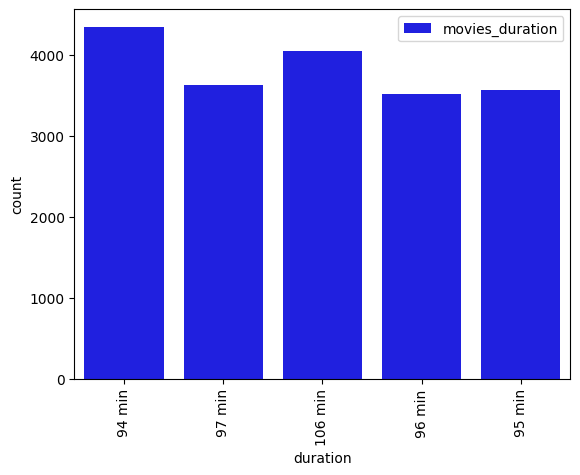

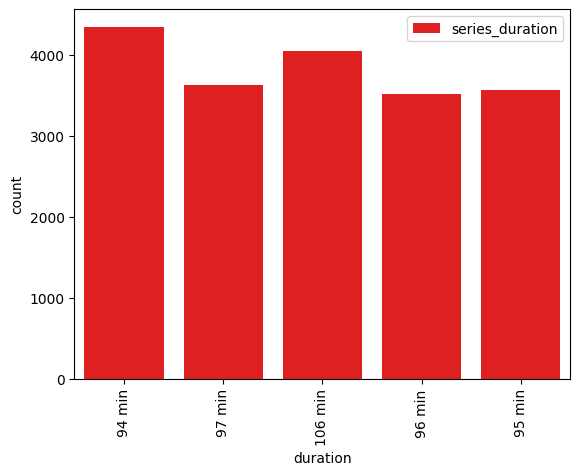

In [ ]:
#Countplot for duration
#movies

top_5_duration_movies=df_final_movies.loc[(df_final_movies["duration"].isin(top5_duration))]
sns.countplot(data=top_5_duration_movies,x="duration",color="blue")
plt.xticks(rotation=90)
plt.legend(["movies_duration"])
plt.show()

#series:



top_5_duration_series=df_final_series.loc[(df_final_series["duration"].isin(top5_duration1))]
sns.countplot(data=top_5_duration_movies,x="duration",color="red")
plt.xticks(rotation=90)
plt.legend(["series_duration"])
plt.show()



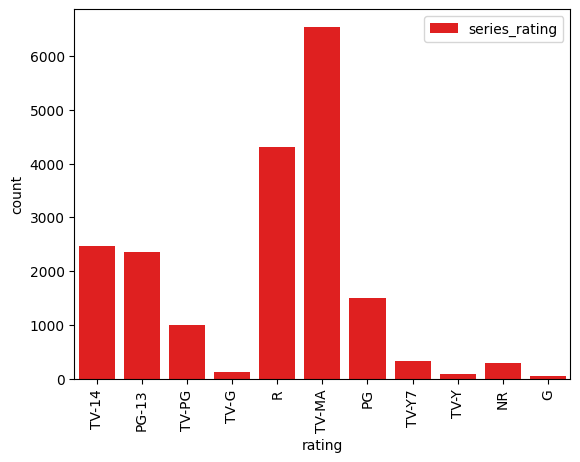

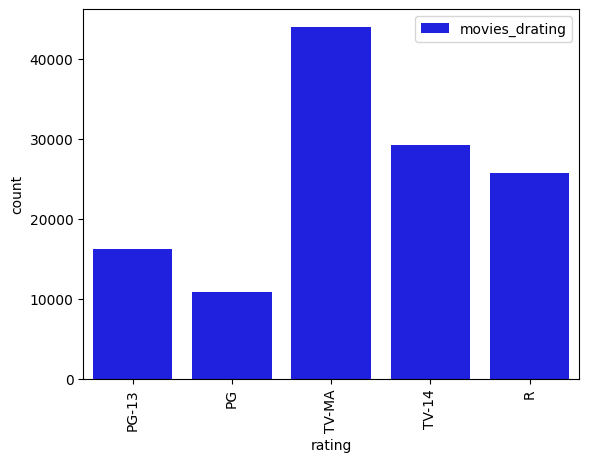

In [ ]:
#countplot_for_rating
#series

top_5_rating_series=df_final_series.loc[(df_final_series["rating"].isin(top5_rating1))]
sns.countplot(data=top_5_duration_movies,x="rating",color="red")
plt.xticks(rotation=90)
plt.legend(["series_rating"])
plt.show()

#movies
top_5_rating_movies=df_final_movies.loc[(df_final_movies["rating"].isin(top5_rating))]
sns.countplot(data=top_5_rating_movies,x="rating",color="blue")
plt.xticks(rotation=90)
plt.legend(["movies_drating"])
plt.show()


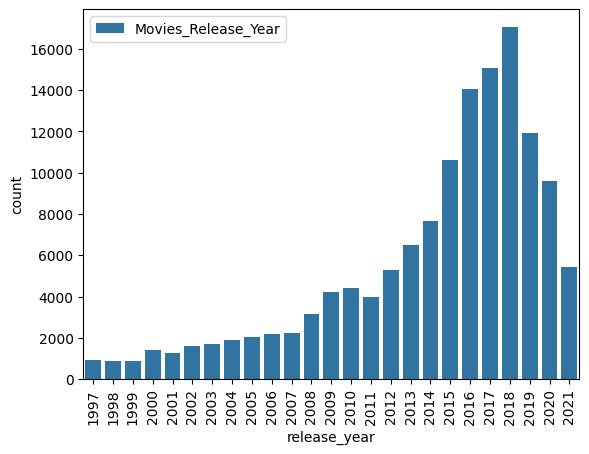

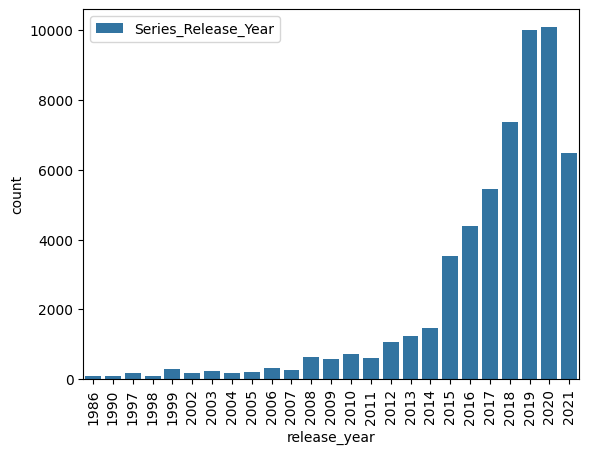

In [ ]:
#countplot for release_year
#movies

top_25_releaseyears=df_final_movies.loc[(df_final_movies["release_year"].isin(top_25_years))]
sns.countplot(data=top_25_releaseyears,x="release_year")
plt.xticks(rotation=90)
plt.legend(["Movies_Release_Year"])
plt.show()


#countplot for release_year
#series

top_25_releaseyears=df_final_series.loc[(df_final_series["release_year"].isin(top_25_years1))]
sns.countplot(data=top_25_releaseyears,x="release_year")
plt.xticks(rotation=90)
plt.legend(["Series_Release_Year"])
plt.show()

**For Categorical Variable - Boxplot **

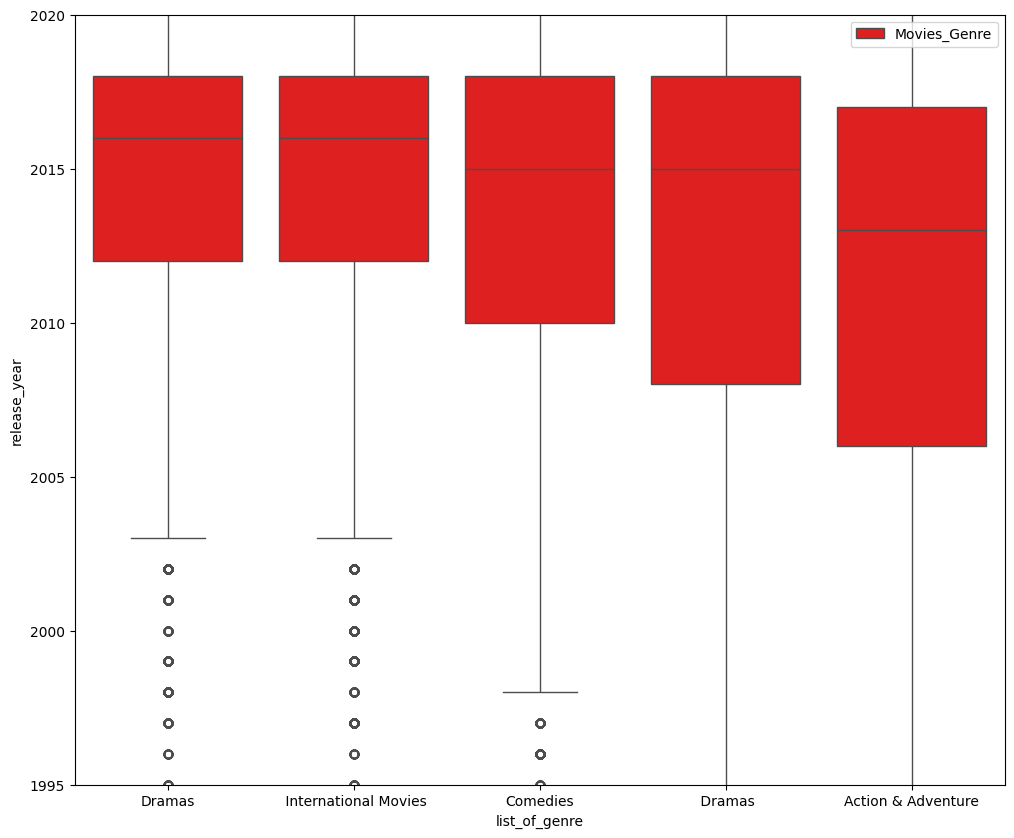

In [ ]:
# TOP 5 Genre v/s last 25 years
#Movies

top_5_movies_genre = df_final_movies.loc[(df_final_movies['list_of_genre'].isin(top5_genre))]
plt.figure(figsize=(12,10))
sns.boxplot(data=top_5_movies_genre,x='list_of_genre',y="release_year",color="r")
plt.ylim(bottom=1995,top=2020)
plt.legend(["Movies_Genre"])
plt.show()

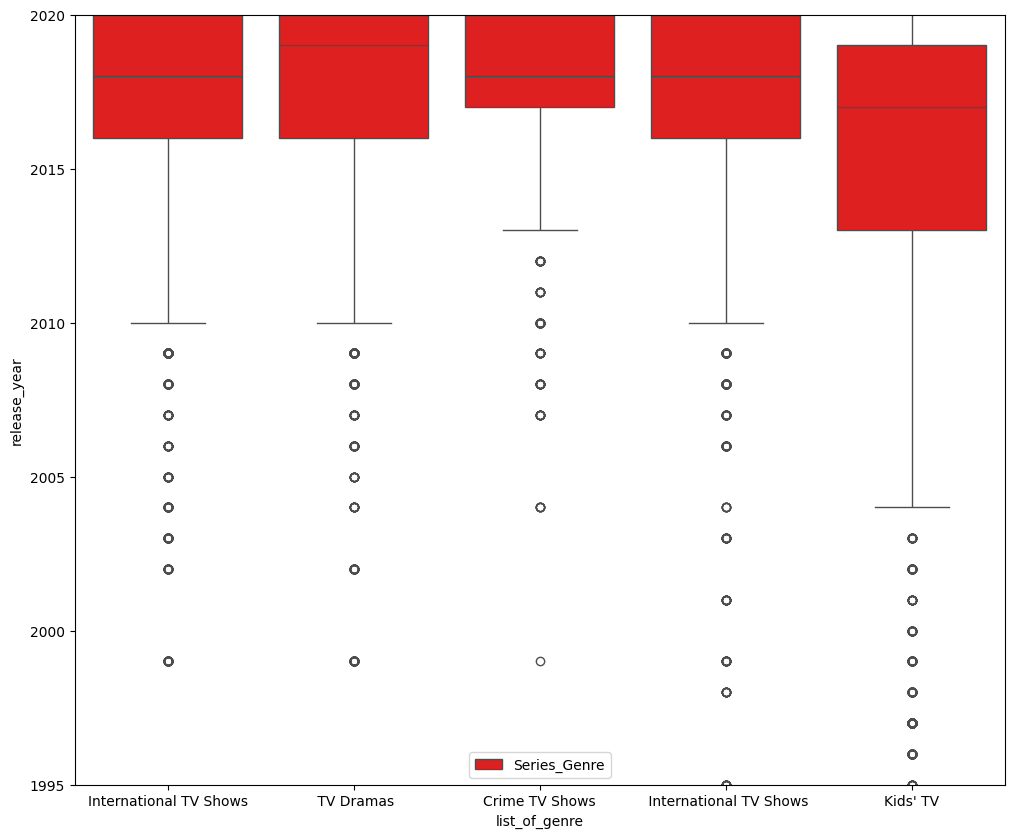

In [ ]:
# TOP 5 Genre v/s last 25 years
#Series

top_5_genre_series = df_final_series.loc[(df_final_series['list_of_genre'].isin(top5_genre1))]
plt.figure(figsize=(12,10))
sns.boxplot(data=top_5_genre_series,x='list_of_genre',y="release_year",color="r")
plt.ylim(bottom=1995,top=2020)
plt.legend(["Series_Genre"])
plt.show()

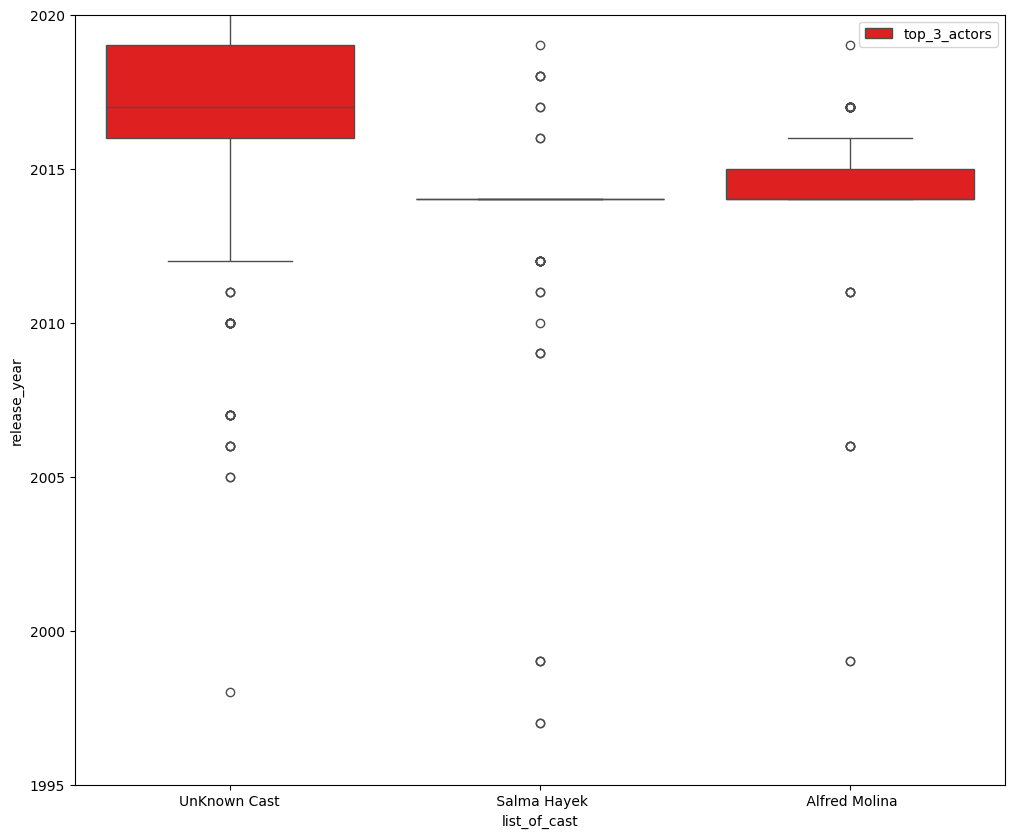

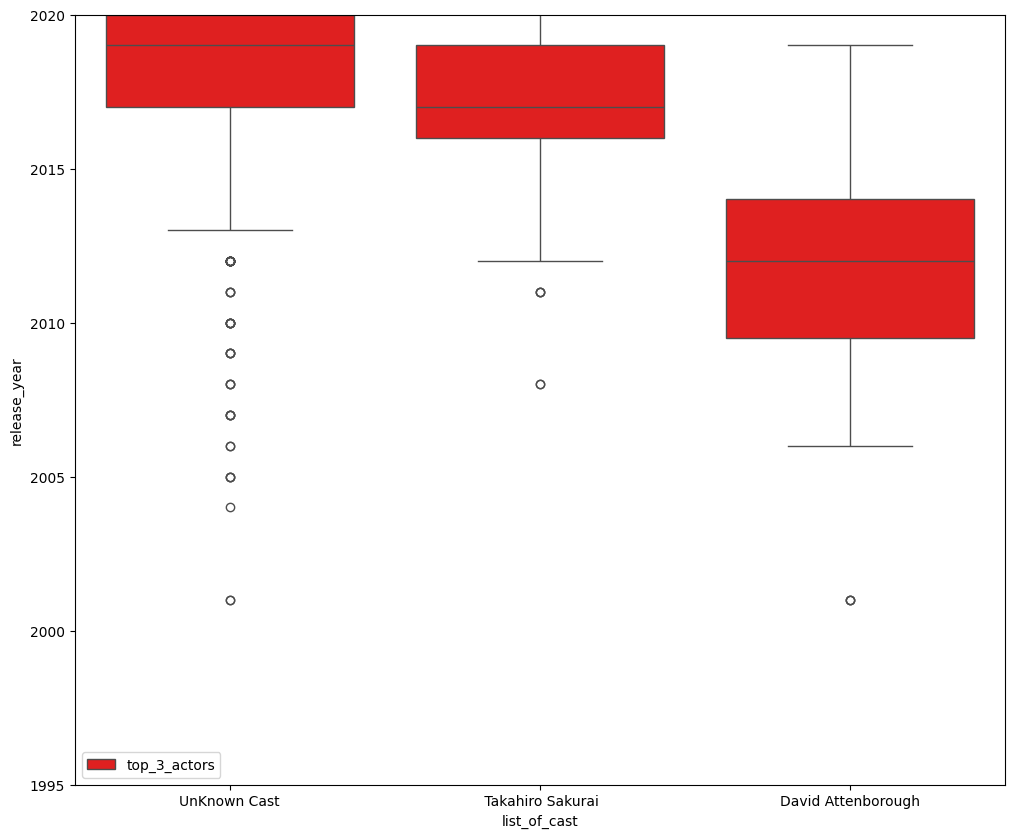

In [ ]:
# TOP 3 Actor v/s last 25 years
#Movies

top_3_actors= df_final_movies.loc[(df_final_movies['list_of_cast'].isin(top3_casts))]
plt.figure(figsize=(12,10))
sns.boxplot(data=top_3_actors,x='list_of_cast',y="release_year",color="r")
plt.ylim(bottom=1995,top=2020)
plt.legend(["top_3_actors"])
plt.show()

#series

top_3_actors= df_final_series.loc[(df_final_series['list_of_cast'].isin(top3_casts1))]
plt.figure(figsize=(12,10))
sns.boxplot(data=top_3_actors,x='list_of_cast',y="release_year",color="r")
plt.ylim(bottom=1995,top=2020)
plt.legend(["top_3_actors"])
plt.show()

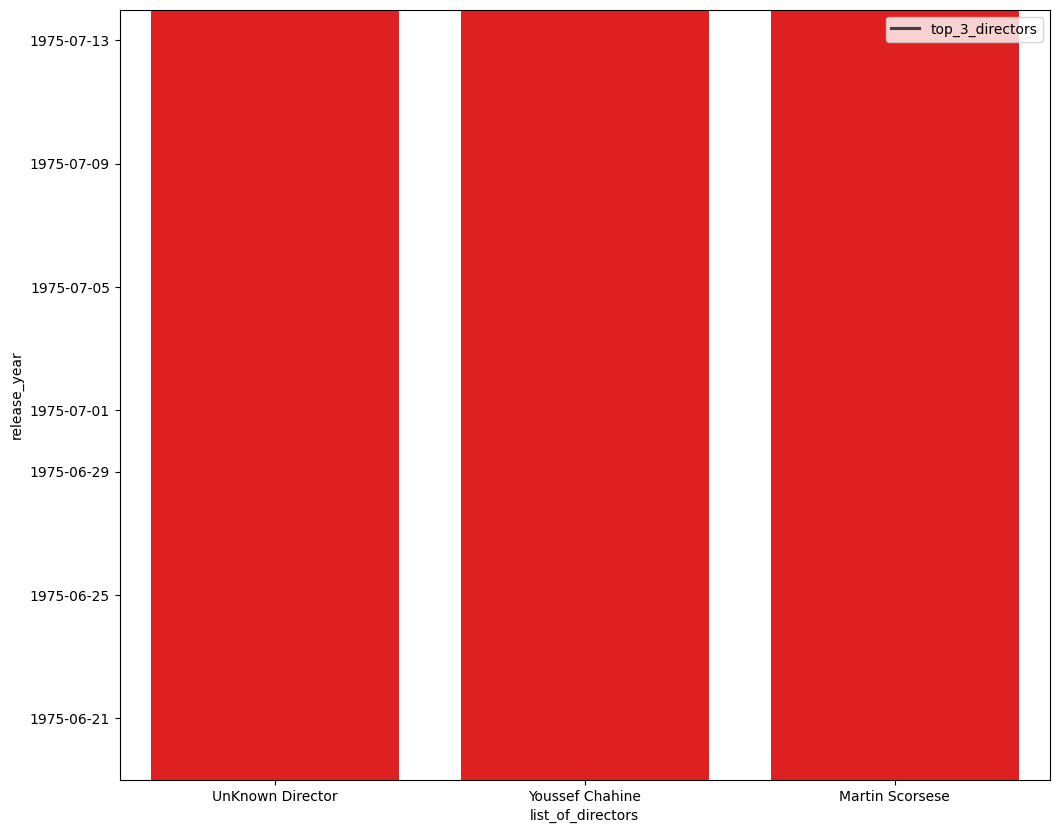

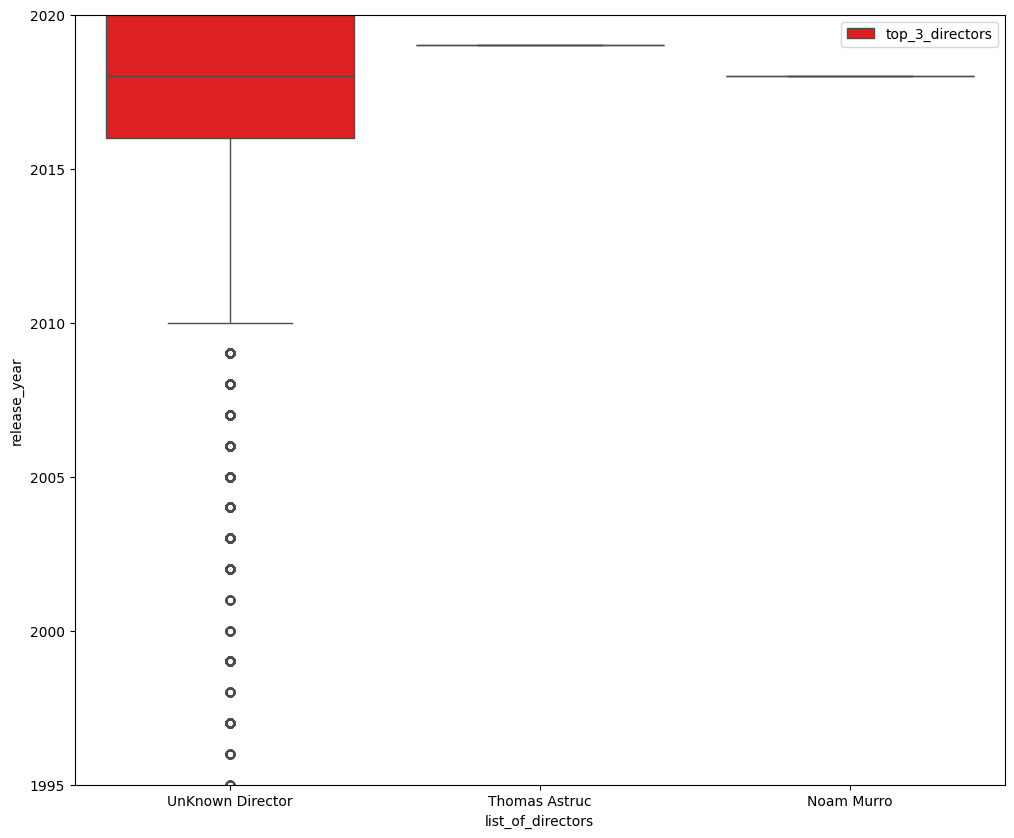

In [ ]:
# TOP 3 Director v/s last 25 years
#Movies

top_3_director= df_final_movies.loc[(df_final_movies['list_of_directors'].isin(top3_directors))]
plt.figure(figsize=(12,10))
sns.barplot(data=top_3_director,x='list_of_directors',y="release_year",color="r")
plt.ylim(bottom=1995,top=2020)
plt.legend(["top_3_directors"])
plt.show()

#series

top_3_directors= df_final_series.loc[(df_final_series['list_of_directors'].isin(top3_directors1))]
plt.figure(figsize=(12,10))
sns.boxplot(data=top_3_directors,x='list_of_directors',y="release_year",color="r")
plt.ylim(bottom=1995,top=2020)
plt.legend(["top_3_directors"])
plt.show()

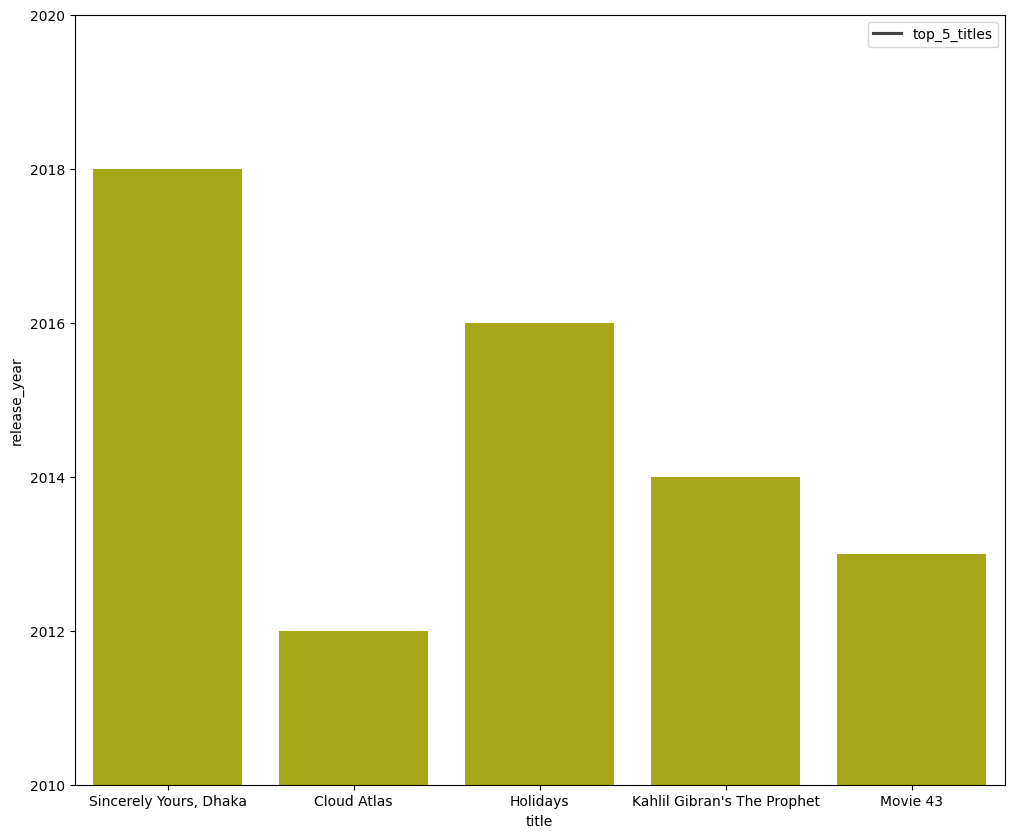

In [ ]:
## top Titles v/s last 10 years
#Movies

top_5_titles = df_final_movies.loc[(df_final_movies['title'].isin(top5_title))]
plt.figure(figsize=(12,10))
sns.barplot(data=top_5_titles,x='title',y="release_year",color="y")
plt.ylim(bottom=2010,top=2020)
plt.legend(["top_5_titles"])
plt.show()


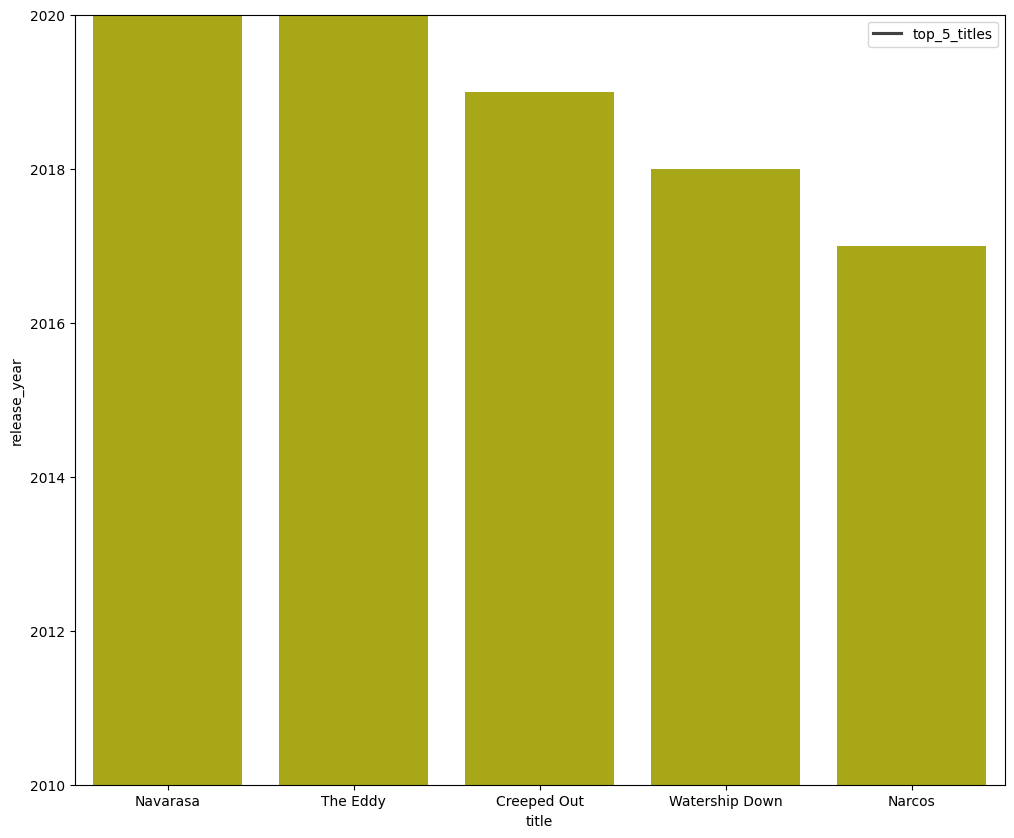

In [ ]:
top_5_title = df_final_series.loc[(df_final_series['title'].isin(top5_title1))]
plt.figure(figsize=(12,10))
sns.barplot(data=top_5_title,x='title',y="release_year",color="y")
plt.ylim(bottom=2010,top=2020)
plt.legend(["top_5_titles"])
plt.show()

**For correlation: Pairplots**



In [ ]:
top_data_actors_directors=df_final_movies.loc[(df_final_movies["list_of_cast"].isin(top3_casts)) & (df_final_movies["list_of_directors"].isin(top3_directors))]
top_data_actors_directors

,title,list_of_cast,list_of_country,list_of_genre,list_of_directors,show_id,type,date_added,release_year,rating,duration,description,month,year
10052,9to5: The Story of a Movement,UnKnown Cast,Unknown Country,Documentaries,UnKnown Director,s405,Movie,NaT,2021-01-01,TV-MA,85 min,"In this documentary, female office workers in ...",July 22,2021
16652,Sisters on Track,UnKnown Cast,Unknown Country,Documentaries,UnKnown Director,s642,Movie,NaT,2021-01-01,PG,97 min,Three track star sisters face obstacles in lif...,June 24,2021
16653,Sisters on Track,UnKnown Cast,Unknown Country,Sports Movies,UnKnown Director,s642,Movie,NaT,2021-01-01,PG,97 min,Three track star sisters face obstacles in lif...,June 24,2021
18759,Trese After Dark,UnKnown Cast,Unknown Country,Anime Features,UnKnown Director,s739,Movie,NaT,2021-01-01,TV-14,36 min,"Stars and creators gather to discuss “Trese,” ...",June 11,2021
18760,Trese After Dark,UnKnown Cast,Unknown Country,Documentaries,UnKnown Director,s739,Movie,NaT,2021-01-01,TV-14,36 min,"Stars and creators gather to discuss “Trese,” ...",June 11,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183488,Smash: Motorized Mayhem,UnKnown Cast,United States,Documentaries,UnKnown Director,s8045,Movie,NaT,2017-01-01,TV-MA,66 min,Buckle up for a look inside a biannual school ...,May 15,2017
183489,Smash: Motorized Mayhem,UnKnown Cast,United States,Sports Movies,UnKnown Director,s8045,Movie,NaT,2017-01-01,TV-MA,66 min,Buckle up for a look inside a biannual school ...,May 15,2017
189432,The Darkest Dawn,UnKnown Cast,United Kingdom,Action & Adventure,UnKnown Director,s8269,Movie,NaT,2016-01-01,TV-MA,75 min,An aspiring filmmaker records the chaos of an ...,June 23,2018
189433,The Darkest Dawn,UnKnown Cast,United Kingdom,Independent Movies,UnKnown Director,s8269,Movie,NaT,2016-01-01,TV-MA,75 min,An aspiring filmmaker records the chaos of an ...,June 23,2018


<Figure size 2000x1500 with 0 Axes>

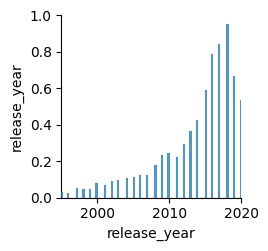

In [ ]:
plt.figure(figsize=(20,15))
sns.pairplot(data=df_final_movies)
plt.xlim(left=1995,right=2020)
plt.show()


**Insights based on Non-Graphical and Visual Analysis: **

Comments on the range of attributes
1.Based on the given data, we observe that there are wide variety of Genres present nowdays which give many content to users.

2.The platform helps the user to display the most watched shows.

Comment on Univariate and Bivariate Analysis:

1.The release of movies on OTT patform like Netflix have significantly increased over years, there were downfall during 2020-2022, the factors could be external like covid.

2.For the duration that the movies people like to watch movies duration between 90 to 100 minutes time interval and for tv shows people has high perferance for shows having 1 or 2 seasons.





**A few major Business Insights: **

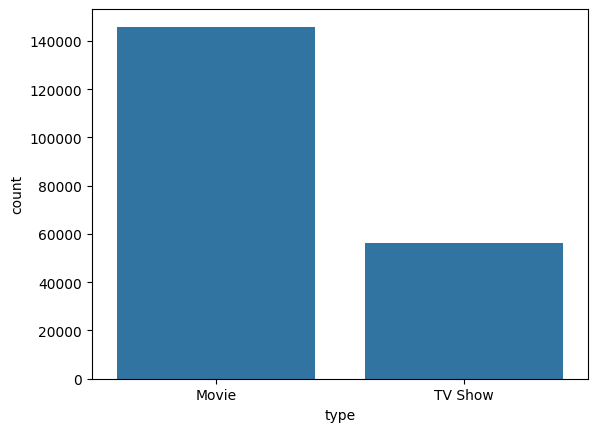

In [ ]:
sns.countplot(data=df4,x='type')
plt.show()

Insight: The graph shows that the demands of movie is higher than the TV Shows

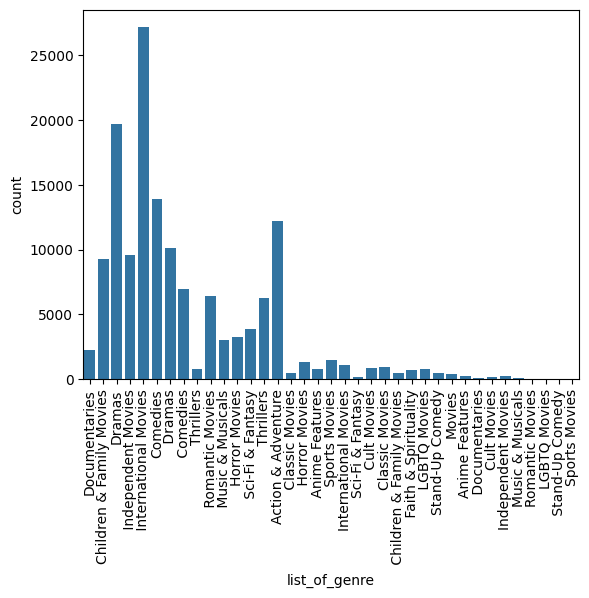

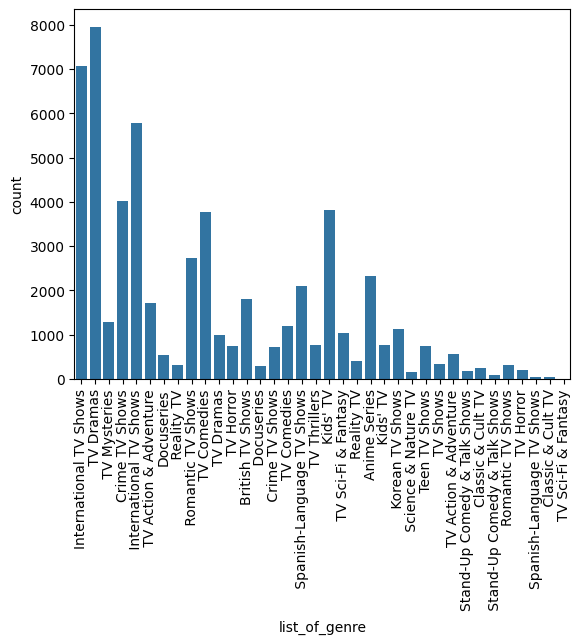

In [ ]:
#movies

sns.countplot(data=df_final_movies,x='list_of_genre')
plt.xticks(rotation=90)
plt.show()


#genre

sns.countplot(data=df_final_series,x='list_of_genre')
plt.xticks(rotation=90)
plt.show()

Insights: The most watched genre for TV shows and Movies are, Dramas, International TV shows, International movies.


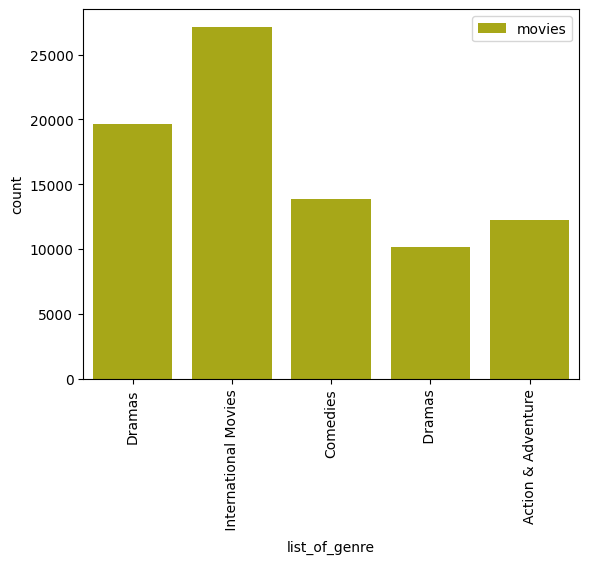

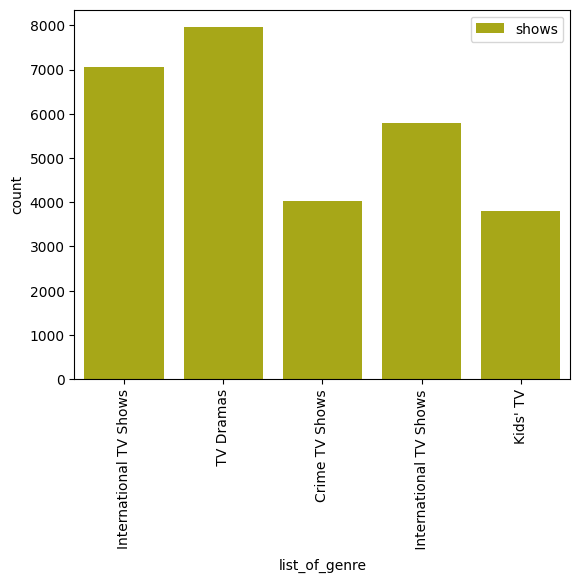

In [ ]:
#top5genre
#movies
top_5_data_Genres=df_final_movies.loc[(df_final_movies["list_of_genre"].isin(top5_genre))]
sns.countplot(data=top_5_data_Genres,x="list_of_genre",color="y")
plt.xticks(rotation=90)
plt.legend(["movies"])
plt.show()

#series

top_5_data_Genres=df_final_series.loc[(df_final_series["list_of_genre"].isin(top5_genre1))]
sns.countplot(data=top_5_data_Genres,x="list_of_genre",color="y")
plt.xticks(rotation=90)
plt.legend(["shows"])
plt.show()


Insights : From the above graph we can conclude that the Dramas, International Movies, Comedies are  genre from Movies which are more popular among the Netflix users and among TV shows we have international TV shows, TV dramas, crime Tv shows in the most popular demand.

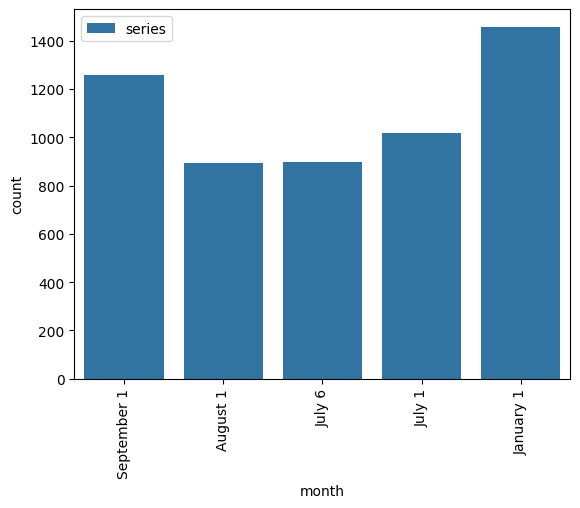

In [ ]:
#top5_months

top5_month = df_final_series.loc[(df_final_series['month'].isin(top5_months1))]
sns.countplot(data=top5_month,x="month")
plt.xticks(rotation=90)
plt.legend(["series"])
plt.show()

Insight: It can be inferrred from the data that series realeased in Sept,January,July are most likely to be watched.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Unknown Country'),
  Text(2, 0, 'India'),
  Text(3, 0, ' United States'),
  Text(4, 0, 'United Kingdom')])

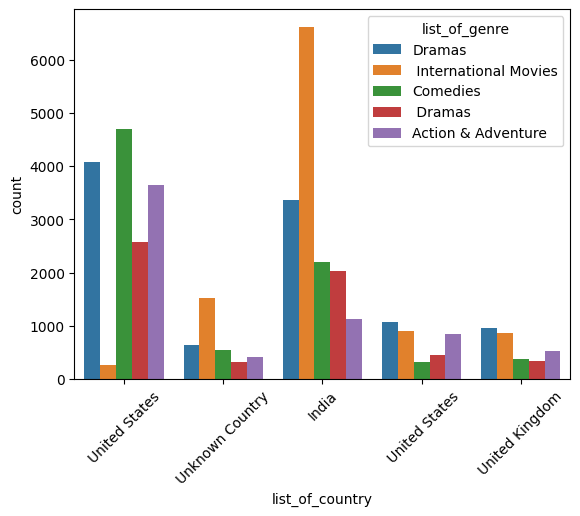

In [ ]:
#top5movies
top_5_genre_country = df_final_movies.loc[(df_final_movies['list_of_genre'].isin(top5_genre))&(df_final_movies['list_of_country'].isin(top5_country))]
sns.countplot(data=top_5_genre_country,x="list_of_country",hue="list_of_genre")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Unknown Country'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'South Korea')])

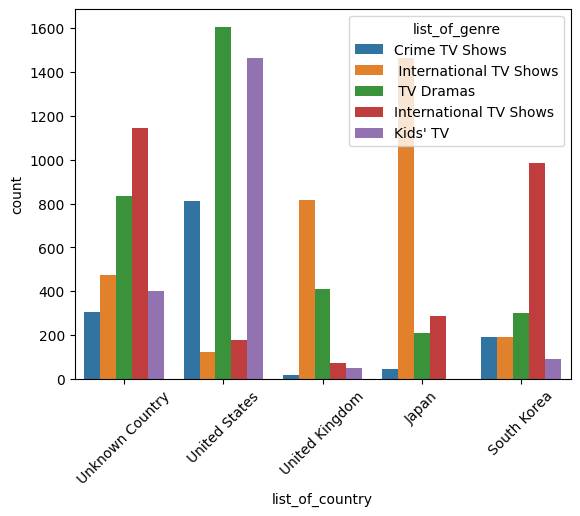

In [ ]:
#top5z_country

top_5_genre_country = df_final_series.loc[(df_final_series['list_of_genre'].isin(top5_genre1))&(df_final_series['list_of_country'].isin(top5_country1))]
sns.countplot(data=top_5_genre_country,x="list_of_country",hue="list_of_genre")
plt.xticks(rotation=45)

The top5 genre for movies watched in the different countries are : drama, comedy action and that in series are International shows.


Recommendations and actionable Insights:

1. The preferance is given more towards comedy and drama movies netlix can enhance the business into the same genre by prioritizing the creation and promotion of content

2. Collaborating with renowned directors such as Youssef Chahine, Martin Scorsese, and Cathy Garcia for movies, and Houda Benyamina, Thomas Astruc, and Noam Murro for TV shows, could further enhance the quality and diversity of Netflix's content.

3. To optimize content consumption, Netflix should focus on the duration of movies within the range of 90-110 minutes and limit TV show seasons to 1-2, aligning with observed preferences for shorter durations.

4. Netflix should focus on sourcing and promoting, content from countries such as the United States, the United Kingdom, Japan, and India, recognizing their significance as key markets with consistent viewing preferences.

5. They could enhance the delivery of content in the peak months like that in
January, July, and October, capitalizing on observed trends in user engagement during these periods.

6. Considering the success factors of similar platforms like Hotstar,jiocinema, Netflix should also analyze the content strategies of competitors to identify regional focuses and tailor its content offerings accordingly for better growth and market penetration, in India, where cutomers still look forward to the regional content.

7. Netflix should consider prioritizing the production of more movie content over TV shows based on the observation that, over the past 25 years, movie ratings have remained consistently level.

